<a href="https://colab.research.google.com/github/SimeonHristov99/ML_21-22/blob/main/06_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Types of Machine Learning Problems

|             |continuous           | categorical    |
|-----------  | --------------      | ----------     |
|**supervised**   | **regression**          | classification |
|**unsupervised** | dimension reduction | clustering     |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# We're going to take a sample dataset from here:
# https://github.com/Columbia-Intro-Data-Science/python-introduction-caitlinwang/blob/master/www-bcf.usc.edu/~gareth/ISL/Advertising.csv
DATA_LINK = 'https://raw.githubusercontent.com/Columbia-Intro-Data-Science/python-introduction-caitlinwang/master/www-bcf.usc.edu/%7Egareth/ISL/Advertising.csv'

In [3]:
# To access function parameters: Cntr + Shift + Space
df = pd.read_csv(DATA_LINK, index_col=0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

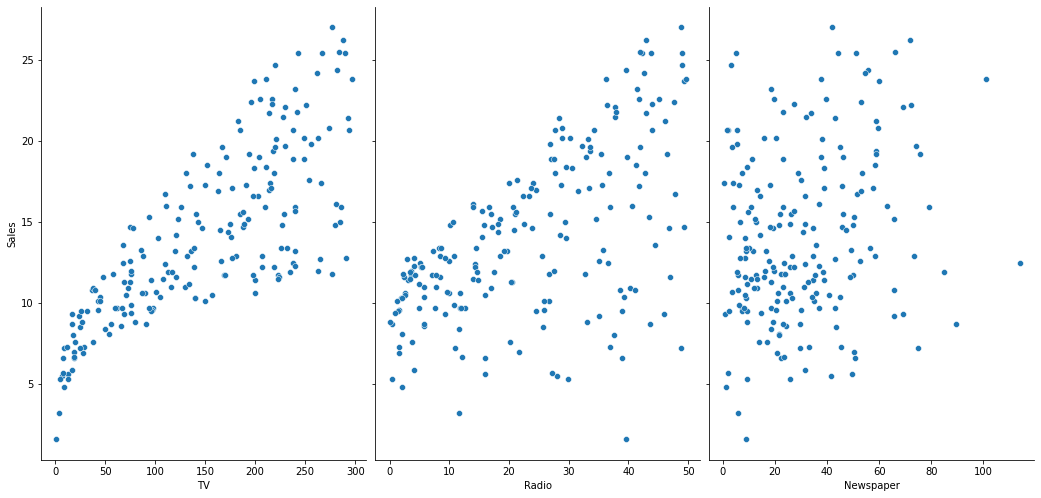

In [4]:
# Instead of manually creating scatterplots for all features vs the target, we
# can use the library `seaborn` to do it for us.
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7)
plt.show()

There appears to be a linear relationship between advertising on TV and sales. In other words, as more advertising is done on TV, more sales are made.

In [5]:
# The `.corr()` method backs this up.
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


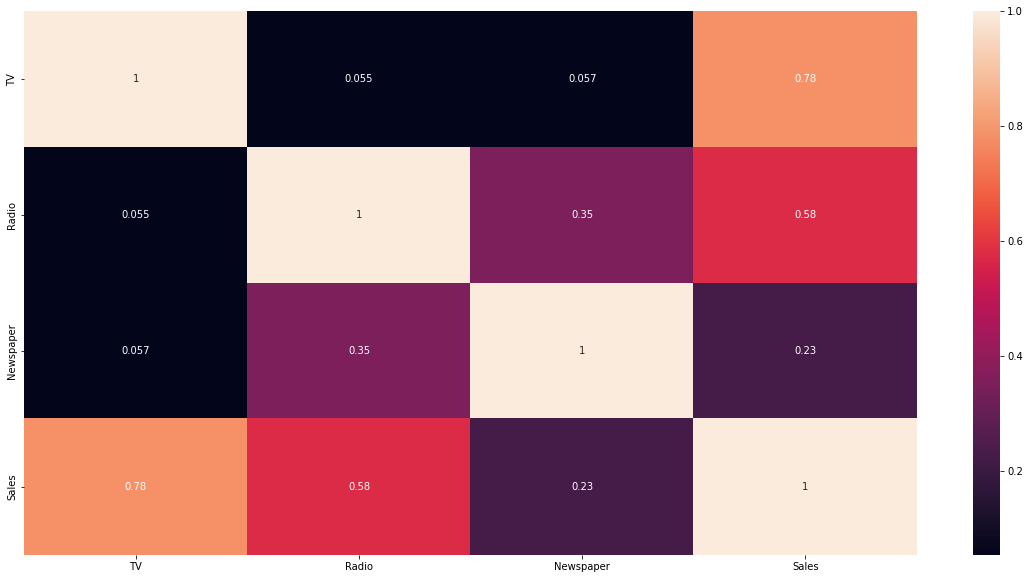

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

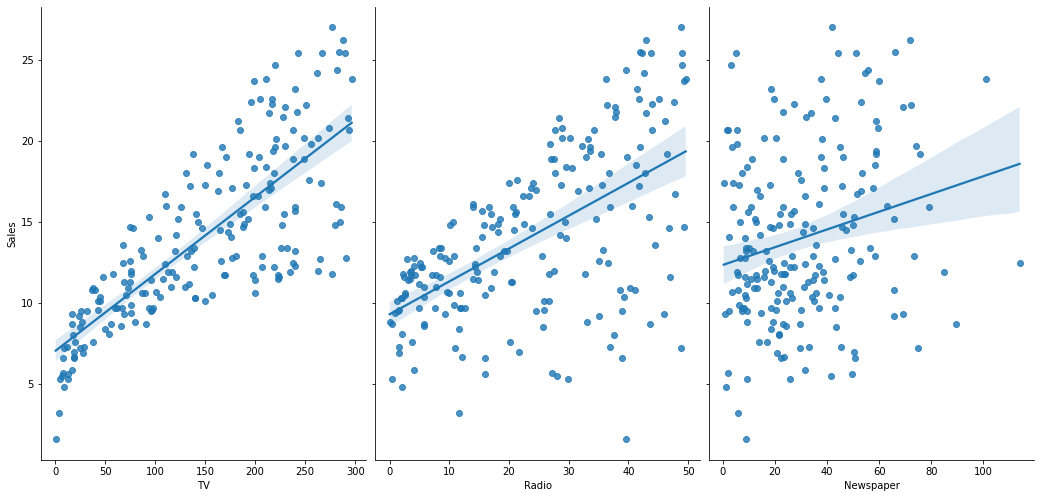

In [17]:
sns.pairplot(
    df,
    x_vars=['TV', 'Radio', 'Newspaper'],
    y_vars='Sales',
    height=7,
    aspect=0.7,
    kind='reg' # In order to see the linear relationship
)
plt.show()

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

### Preprocessing

In [21]:
def preprocess_inputs(df):
  df = df.copy()

  # Split into X and y
  y = df['Sales']
  X = df.drop(['Sales'], axis=1)

  # Train/test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

  return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [23]:
X_train

,TV,Radio,Newspaper
170,284.3,10.6,6.4
98,184.9,21.0,22.0
32,112.9,17.4,38.6
13,23.8,35.1,65.9
36,290.7,4.1,8.5
...,...,...,...
107,25.0,11.0,29.7
15,204.1,32.9,46.0
93,217.7,33.5,59.0
180,165.6,10.0,17.6


In [24]:
y_train

170    15.0
98     15.5
32     11.9
13      9.2
36     12.8
       ... 
107     7.2
15     19.0
93     19.4
180    12.6
103    14.8
Name: Sales, Length: 140, dtype: float64

### Training

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Interpreting model coefficients

In [26]:
# print the intercept and coefficients
print(model.intercept_)
print(model.coef_)

2.7089490925159048
[0.04405928 0.1992875  0.00688245]


In [ ]:
# pair the feature names with the coefficients
list(zip(df.columns, model.coef_))

[('TV', 0.044059280957465224),
 ('Radio', 0.19928749689893954),
 ('Newspaper', 0.006882452222275487)]

$$y = 2.71 + 0.044 \times TV + 0.199 \times Radio + 0.00688 \times Newspaper$$

How do we interpret the **TV coefficient** (0.044)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.044 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 44 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **four common evaluation metrics** for regression problems:

In [ ]:
# make predictions on the testing set
y_pred = model.predict(X_test)

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$MAE = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [ ]:
np.sum(np.abs(y_pred - y_test)) / len(y_test)

1.5116692224549086

In [ ]:
mean_absolute_error(y_test, y_pred)

1.5116692224549086

**Mean Squared Error** (MSE) is the mean of the squared errors. The model gets punished harsher for larger errors:

$$MSE = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [ ]:
np.sum(np.sum((y_pred - y_test)**2)) / len(y_test)

3.796797236715219

In [ ]:
mean_squared_error(y_test, y_pred)

3.796797236715219

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors: 

$$RMSE = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

The model still gets punished harsher for larger error, but now we also have an error that we can interpret: On average we are almost 2 000 items away from the true value.

In [ ]:
mse = np.sum(np.sum((y_pred - y_test)**2)) / len(y_test)
mse ** (1/2)

1.9485372043446385

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


This is not that bad, since 1: the range is 26 000 and 2: we are below the standard deviation (5 000).

> **Standard deviation (std)**: A quantity expressing by how much the members of a group differ from the mean value for the group.

**Coefficient of determination** ($R^2$ score) represents how close the data are to the fitted regression line. Ranges from `-inf` to `1`. A constant model that always predicts the expected value of `y`, disregarding the input features, would get a score of `0.0`.

$$R^2 = 1 - \frac {RSS} {TSS}$$

$R^2$	= 	coefficient of determination

$RSS$	= 	sum of squares of residuals

$TSS$	= 	total sum of squares 

In [ ]:
rss = np.sum((y_test - y_pred)**2)
tss = np.sum((y_test - y_test.mean())**2)
1 - rss / tss

0.8609466508230368

In [ ]:
model.score(X_test, y_test)

# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred)

0.8609466508230368

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- $R^2$ is usually used with **RMSE** to compare the model with the baseline model (the one that always predicts the mean of the target).

## Feature selection

We saw that the `Newspaper` column had very weak correlation with the `Sales` column. Let's remove it and check the RMSE and R^2!

In [ ]:
def preprocess_inputs(df):
  df = df.copy()

  # Drop columns with weak correlations
  df = df.drop(['Newspaper'], axis=1)

  # Split into X and y
  y = df['Sales']
  X = df.drop(['Sales'], axis=1)

  # Train/test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)
X_train

,TV,Radio
170,284.3,10.6
98,184.9,21.0
32,112.9,17.4
13,23.8,35.1
36,290.7,4.1
...,...,...
107,25.0,11.0
15,204.1,32.9
93,217.7,33.5
180,165.6,10.0


In [ ]:
y_train

170    15.0
98     15.5
32     11.9
13      9.2
36     12.8
       ... 
107     7.2
15     19.0
93     19.4
180    12.6
103    14.8
Name: Sales, Length: 140, dtype: float64

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Prev RMSE: 1.9485372043446385 (lower is better)
# Prev R^2: 0.8609466508230368 (higher is better)

print(f'RMSE     : {np.sqrt(mse)}')
print(f'R^2 score: {model.score(X_test, y_test)}')

RMSE     : 1.9154756731764253
R^2 score: 0.8656253548947075


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

## For home

Try out linear regression on [this dataset](t).